# Building A Simple Cluster

![Static Badge](https://img.shields.io/badge/Written_By-Eliza_Diggins-black?logo=github)
![Static Badge](https://img.shields.io/badge/Contact%20Me-eliza.diggins%40utah.edu-black?style=flat)

---

## Contents

- [Overview](#Overview)
- [Selecting Radial Profiles](#Selecting-Radial-Profiles)
- [Creating the Galaxy Cluster](#Creating-The-Galaxy-Cluster)

---

## Overview

The steps to creating a galaxy cluster model are relatively simple:

1. Pick out the physical properties we're going to supply so ``cluster_generator`` can make the rest of the cluster.
2. Set up those physical profiles.
3. Feed them into ``cluster_generator``.

From there, we can just sit back and watch ``cluster_generator`` do all the work!

## Selecting Radial Profiles

The ``cluster_generator.radial_profiles`` module provides an array of radial profiles to choose from, but we're going to choose the simplest possible configuration for this example. We'll use an [NFW Profile](https://en.wikipedia.org/wiki/Navarro%E2%80%93Frenk%E2%80%93White_profile) for both the gas density and the total density and let ``cluster_generator`` take things from there. We'll use the following parameters:

- $r_{\rm{s,total}} = 600\; \rm{kpc}$
- $r_{\rm{s,gas}} = 250\; \rm{kpc}$

- $\rho_{0,\rm{total}} = 10^6 \; \rm{M_\odot \; kpc^{-3}}$
- $\rho_{0,\rm{gas}} = 10^5 \; \rm{M_\odot \; kpc^{-3}}$

In [1]:
from cluster_generator.radial_profiles import nfw_density_profile

# Setup the total density profile
total_density = nfw_density_profile(1e6, 600)
gas_density = nfw_density_profile(1e5, 250)

We can quickly generate a plot of the profiles:

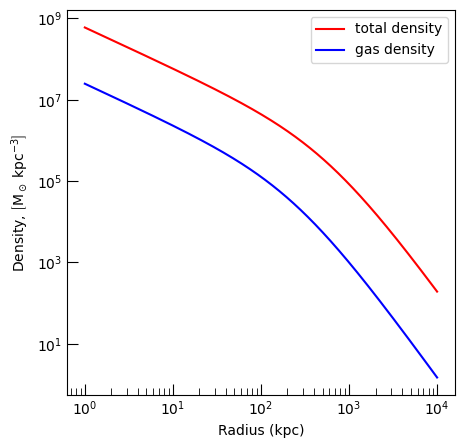

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))

_, ax = total_density.plot(1, 1e4, ls="-", color="red", label="total density", fig=fig)

# add the gas density as well
gas_density.plot(1, 1e4, ls="-", color="blue", label="gas density", ax=ax, fig=fig)

ax.legend()
ax.set_ylabel(r"Density, $\left[\mathrm{M_\odot \; kpc^{-3}}\right]$")

plt.show()

## Creating the Galaxy Cluster

All we have to do now to produce the cluster is feed the radial profiles into the ``model.ClusterModel`` class. The ``ClusterModel`` class has a useful ``.from_dens_and_tden`` method that allows us to simply feed in the radial profiles:

In [3]:
from cluster_generator.model import ClusterModel

# Generate the model
model = ClusterModel.from_dens_and_tden(1, 1e4, gas_density, total_density)

cluster_generator : [INFO     ] 2024-07-18 00:53:09,450 Computing the profiles from density and total density.
cluster_generator : [INFO     ] 2024-07-18 00:53:09,469 Integrating total mass profile.
cluster_generator : [INFO     ] 2024-07-18 00:53:09,525 Integrating pressure profile.
cluster_generator : [INFO     ] 2024-07-18 00:53:11,623 Integrating gravitational potential profile.


Under the hood, ``cluster_generator`` uses the assumption of spherical symmetry and hydrostatic equilibrium to generate all of the other fields for us. 

Let's look at what information our model contains:

In [4]:
# Print out all of the available model fields:

for field in model.fields:
    print(f"Model has field {field} with units {model[field].units}")

Model has field radius with units kpc
Model has field density with units Msun/kpc**3
Model has field total_density with units Msun/kpc**3
Model has field total_mass with units Msun
Model has field gas_mass with units Msun
Model has field gravitational_field with units kpc/Myr**2
Model has field pressure with units Msun/(Myr**2*kpc)
Model has field temperature with units keV
Model has field gravitational_potential with units kpc**2/Myr**2
Model has field dark_matter_density with units Msun/kpc**3
Model has field dark_matter_mass with units Msun
Model has field gas_fraction with units dimensionless
Model has field electron_number_density with units cm**(-3)
Model has field entropy with units cm**2*keV


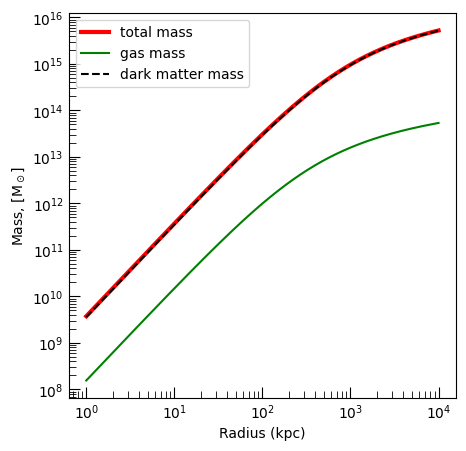

In [5]:
fig = plt.figure(figsize=(5, 5))

_, ax = model.plot("total_mass", ls="-", lw=3, color="red", label="total mass", fig=fig)
_, _ = model.plot("gas_mass", ls="-", color="green", label="gas mass", fig=fig, ax=ax)
_, _ = model.plot(
    "dark_matter_mass", ls="--", color="k", label="dark matter mass", fig=fig, ax=ax
)

ax.set_ylabel(r"Mass, $\left[\mathrm{M_\odot}\right]$")
ax.legend()


plt.show()

It's also interesting to look at the temperature:

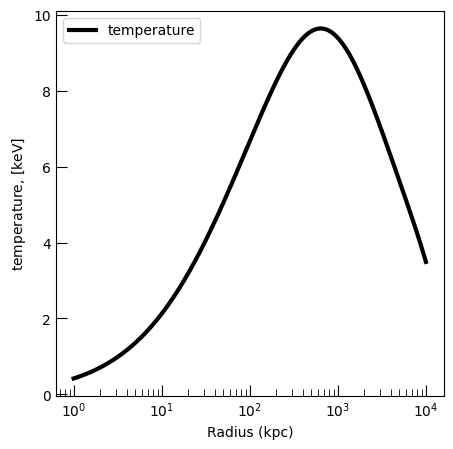

In [6]:
fig = plt.figure(figsize=(5, 5))

_, ax = model.plot("temperature", ls="-", lw=3, color="k", label="temperature", fig=fig)

ax.legend()
ax.set_yscale("linear")

plt.show()

Now that you've generated a model, you can use it for all sorts of things: loading into simulations, exporting to ``yt``, etc.